## Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Load the raw data

In [4]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('car information.csv')
    
# Let's explore the top 5 rows of the df
raw_data.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [7]:
# By default, only descriptives for the numerical variables are shown (NaN / words variables are excluded)
# To include the categorical ones (includes words var), add command: include = 'all'
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


- Useless variables such as '312' models and '3947' registration should be drop

### Determining the variables of interest

In [10]:
# Drop model columns
# axis=0 refers rows, while axis=1 refers columns 
data = raw_data.drop(['Model'],axis=1)

# Check the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [12]:
# data.isnull() shows a df with the information whether a data point is null 
# True (1) = the data point is missing, while False (0) = the data point is not missing
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

 - Price and EngineV only contains missing values 

In [14]:
# Let's simply drop all missing values ()
# Rule of tumb: if removing less than 5% of observations, it's safe to remove all missing values
data_no_mv = data.dropna(axis=0) #drops all rows that contains "missing" values

In [15]:
# Check the descriptives without the missing values
data_no_mv.describe(include='all') #count is now 4025 compared to 4173

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


- \\$6,999 + \\$11,500 +  \\$21,900 = \\$40,399, which doesn't make sense as max price is $300,000

### Exploring the PDFs

<Axes: xlabel='Price', ylabel='Density'>

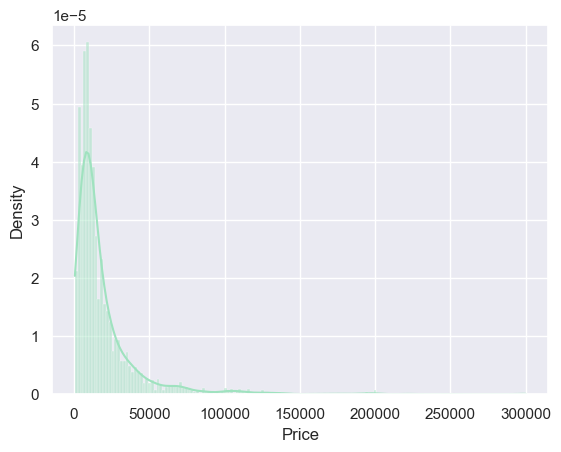

In [18]:
# Display the Probability Distribution Function (PDF) of a variable to spot anomalies, such as outliers
# The PDF will show us how that variable is distributed 
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.set_palette(["#9FE2BF"]) #seafoam color
sns.histplot(data_no_mv['Price'], kde=True, stat="density", color="#9FE2BF")

- Outliers = observations that lie on abnormal distance from other observations in data
- One way to remove outliers is to remove top 1% of observations data.
- outliers are situated around the higher prices (right side of the graph)
- Logic should also be applied since this is a dataset about used cars, therefore $300,000 is an excessive price
- Outliers are a great issue for OLS, so we must deal with them
- It may be a useful exercise to try training a model without removing the outliers

### Dealing with outliers

In [21]:
# Declare a variable that will be equal to the 99th percentile of the 'Price' variable
# DataFrane,quantile(0.25 etc) returns the value at given quantile (=np.percentile) (etc 0.25 gives 25th percentile)
q = data_no_mv['Price'].quantile(0.99) #we include 99th percentile, excluding top 1% percentile

# Create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]

# Check that it removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Price', ylabel='Density'>

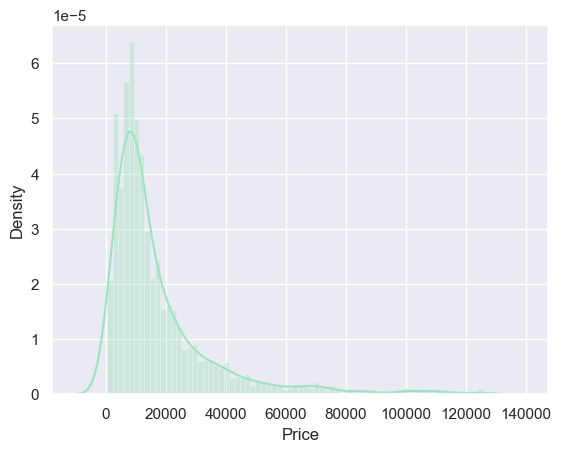

In [22]:
# check the PDF once again to ensure that the result is still distributed in the same way overall
sns.histplot(data_1['Price'], kde=True, stat="density",
             kde_kws=dict(cut=3), alpha=.4, 
             edgecolor=(1, 1, 1, .4), color="#9FE2BF",
            )

<Axes: xlabel='Mileage', ylabel='Density'>

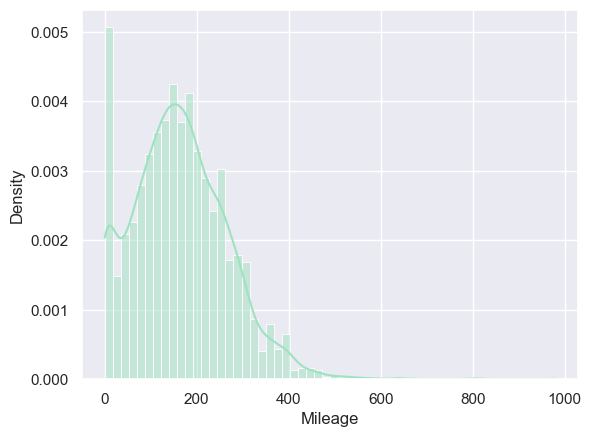

In [23]:
# Check other variables
sns.histplot(data_no_mv['Mileage'], kde = True, stat= "density", color = "#9FE2BF")

<Axes: xlabel='Mileage', ylabel='Density'>

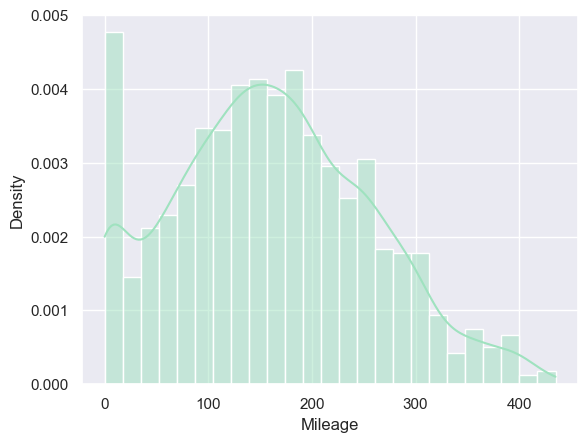

In [24]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.histplot(data_2['Mileage'], kde=True, stat="density",color="#9FE2BF")

<Axes: xlabel='EngineV', ylabel='Density'>

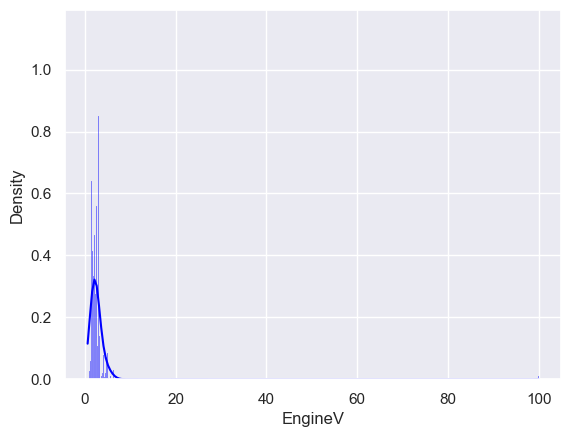

In [25]:
sns.histplot(data_no_mv['EngineV'], kde=True, stat="density",color="blue")

In [26]:
# Manually check what issue comes from, which is the fact that most missing values are indicated with "99.99"
# There are also some incorrect entries like 75
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis=0)
EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


- Do a quick google search and find what is the usual litre for engine.
- "Examples include the 1923–1930 Cadillac Series 353 (powered by a 353 Cubic inch/5.8-litre engine)" -(https://en.wikipedia.org/wiki/Engine_displacement)
- Thus, the usual car engine valume should be at least below 6.5L 

<Axes: xlabel='EngineV', ylabel='Density'>

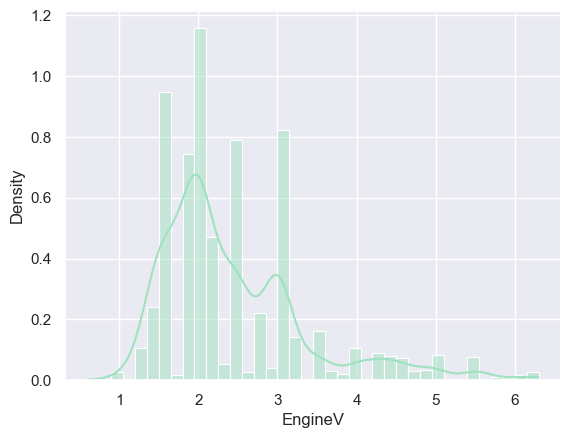

In [28]:
# The natural domain of this variable Car engine volumes are usually between 0.6 to 6.5l (google search)
data_3 = data_2[data_2['EngineV']<6.5]
sns.histplot(data_3['EngineV'], kde=True, stat="density",color="#9FE2BF")

<Axes: xlabel='Year', ylabel='Density'>

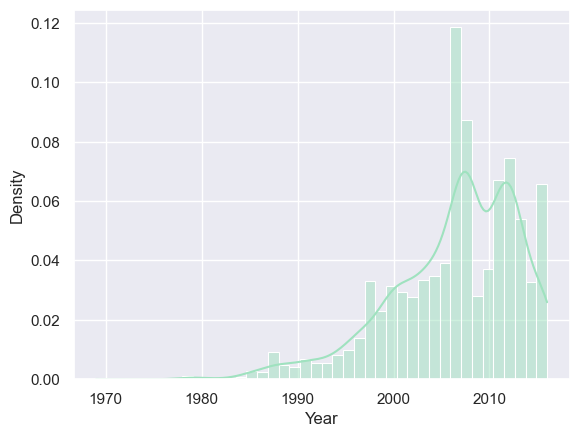

In [29]:
# Outliers are on the low end
sns.histplot(data_no_mv['Year'], kde=True, stat="density",color="#9FE2BF")

In [30]:
# Remove 1% bottom percentile
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<Axes: xlabel='Year', ylabel='Density'>

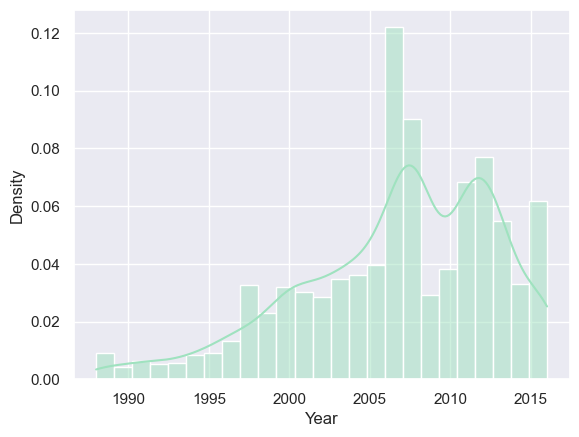

In [31]:
sns.histplot(data_4['Year'], kde=True, stat="density",color="#9FE2BF")

In [159]:
# When we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
#So we need to reset the indexes so as to go as: 0,1,2,3,4,5

# Once we reset the index, a new column will be created containing the old index (just in case)
# 'drop=True' to completely delete that new created column
data_cleaned = data_4.reset_index(drop=True)

In [161]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


## Check the Ordinary Least Square (OLS) assumptions

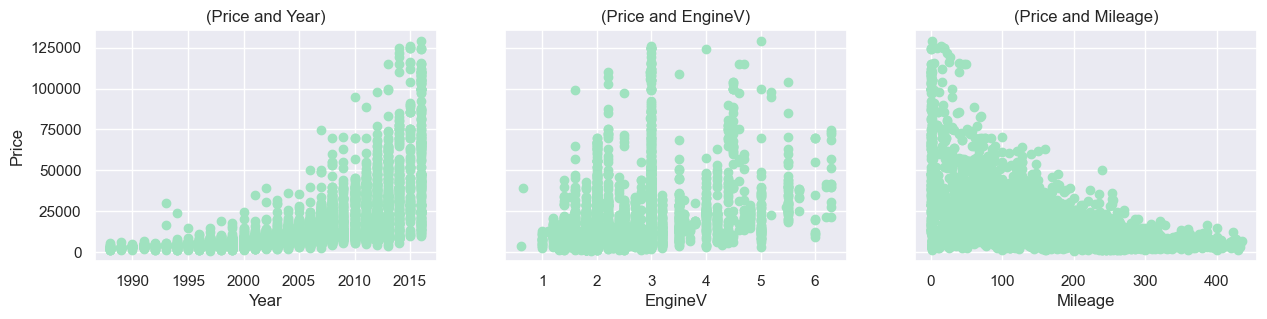

In [177]:
# Here we decided to use some matplotlib code, without explaining it
# Price is the 'y' axis of all the plots, Plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' on 3 graph as y-axis
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('(Price and Year)')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('(Price and EngineV)')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('(Price and Mileage)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Year')
ax2.set_xlabel('EngineV')
ax3.set_xlabel('Mileage')
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

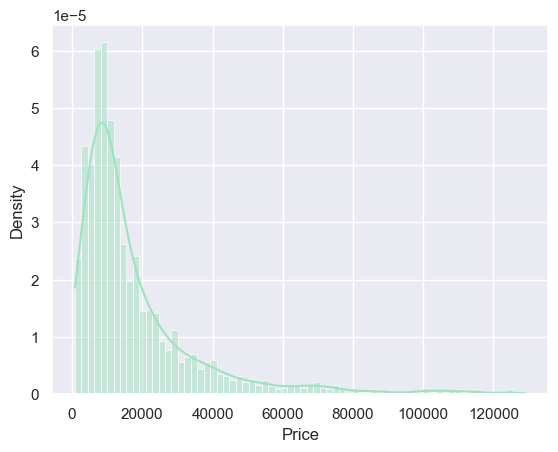

In [36]:
sns.histplot(data_cleaned['Price'], kde=True, stat="density",color="#9FE2BF")

- From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed / skewed distribution
- A good transformation in that case is a log transformation. (etc. ln(4200) = 8.342840)

### Relaxing the assumptions

In [39]:
# Let's transform 'Price' with a log transformation because it is right-skewed distribution
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


<Axes: xlabel='log_price', ylabel='Density'>

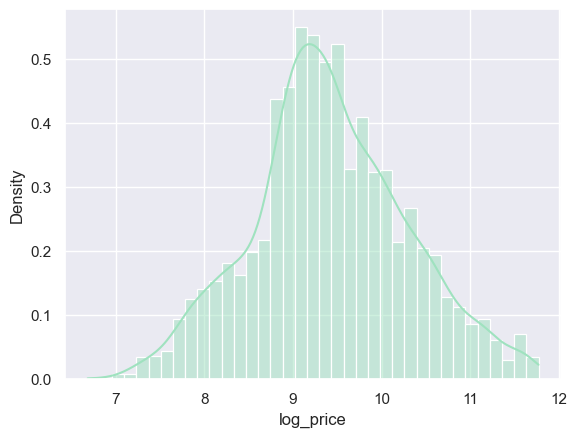

In [40]:
sns.histplot(data_cleaned['log_price'], kde=True, stat="density",color="#9FE2BF")

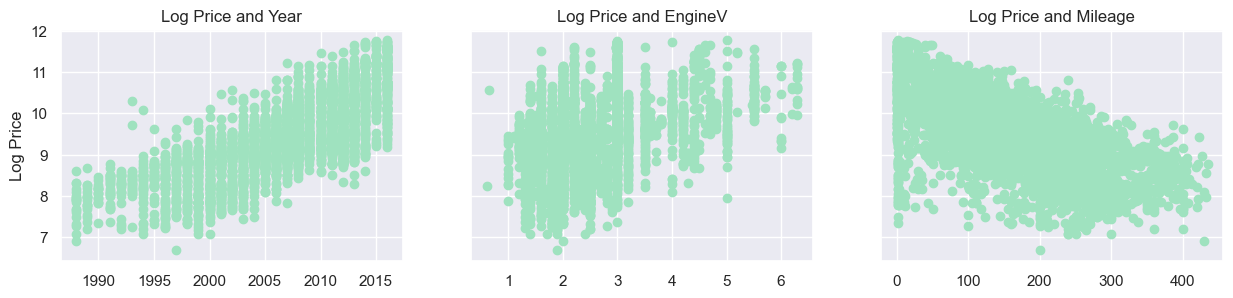

In [153]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
ax1.set_ylabel('Log Price')

plt.show()

# The relationships show a clear and good linear relationship
# Alternatively we could have transformed each of the independent variables

In [42]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [44]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [45]:
# sklearn does not have a built-in way to check for multicollinearity
# One of the best way to check for multicollinearity is through Variance Inflation Factor (VIF)
# VIF is a measure that estimates how much larger the square root of standard error of an estimate is 
# VIF = 1 indicates no mutlicollinearity. 2 - 5 indicates mild correlation (still safe). More than 5-10 indicates high correlation (unacceptable).

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Declare a variable where we put all features to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# Create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# Make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [46]:
# Since Year has the highest VIF, it will be removed from the model
# This will drive the VIF of other variables down!!! 
# This means once 'Year' is gone, "EngineV" won't have a high VIF anymore
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

- Dummy variables are essential if you have categorical predictors (e.g., “red,” “green,” “blue” for a color variable) and want to include them in a linear regression model.
- Linear models require numerical input, so dummies convert categories into numbers while retaining information about each level.

In [219]:
# To include the categorical data in the regression, let's create dummies
# 'pd.get_dummies()' spots all categorical variables and creates dummies automatically
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [221]:
# Here's the result
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.90,8.97,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.00,9.50,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.20,10.04,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.00,9.81,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Rearrange

In [52]:
# To make our data frame more organized, place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [53]:
# Declare a new variable that will contain the preferred order
# Most intuitive order: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [54]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Linear regression model

### Declare the inputs and the targets

In [57]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

- It is difficit to compare different measurement units such as 277	mileage and  8.342840 log_price
- Solution: we scale them into comparable values using various methods such as standardization: new_value = (orignal_value - x̄) / σ

In [59]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [60]:
# Actual scaling process
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [62]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [241]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [65]:
# store outputs of the regression in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

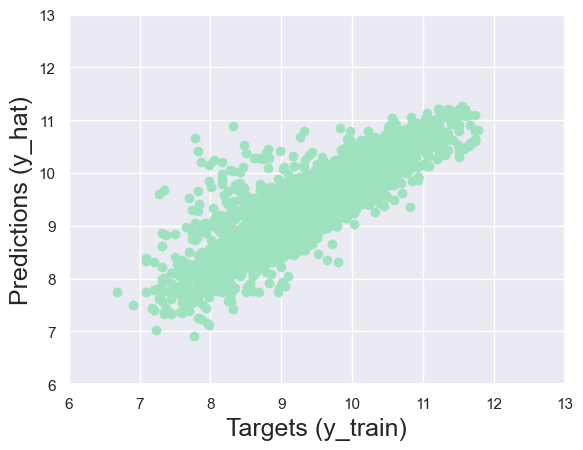

In [66]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

- The closer the points to the 45-degree line (line from (6,6) to (13,13)), the better the prediction
- For example, if the point for prediction y-axis is 7, we want this point to be as close at target x-axis 7 also
- In this case, y_hat at point 7.5, y_train is at 6.9 which means that predictions are abit higer than target.
- We want the x-axis and the y-axis to be the same to get the most perfect prediction
- Sometimes, the plot will have different scales of the x-axis and the y-axis, which is harder to interpret the '45-degree line'. Thus, use "Residual plot" in addition.

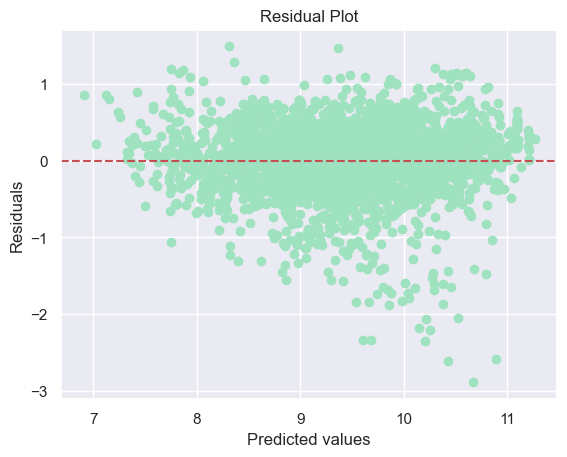

In [251]:
# Residual plot
plt.scatter(y_hat, y_train - y_hat)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

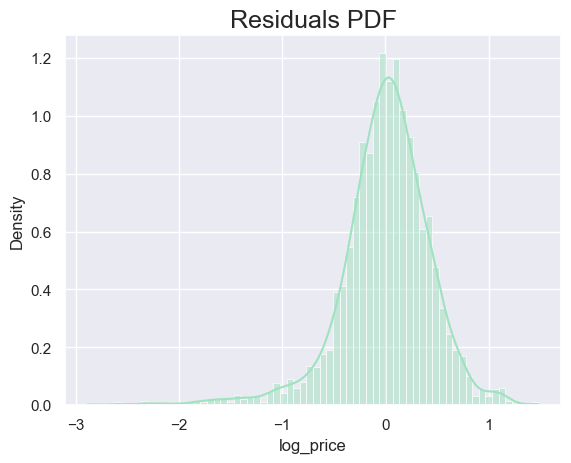

In [247]:
# Plot the PDF of the residuals and check for anomalies
# The error must be normally distributed with a  mean of zero.
# The residuals are the estimates of the errors 
sns.histplot(y_train - y_hat, kde=True, stat="density", color="#9FE2BF") #(actual - predicted values)
plt.title("Residuals PDF", size=18)

- From the graph, mean is zero and it is negatively skewed (left tail is longer - many negative residuals)
- Since (y_train - y_hat) is much lower than the mean, this imply that y_hat (predictions) are much higher than y_train (targets)
- This also means the predictions overestimates the target, and rarely understimates it (since it's less positive skewed)

In [70]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# note that this is NOT the adjusted R-squared

0.744996578792662

- Our model is explaining 75% of variability of data, which is considered safe

### Finding the weights and bias

In [73]:
# Obtain the bias (intercept) of the regression (to get baseline/starting point prediction)
reg.intercept_

9.415239458021299

In [74]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [75]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


- Positive weights shows feature increase, log price / price increase
- negative weights shows feature increase, log price / price decrease
- Notices that there's only 6 brands in features, 1 brand is missing

In [77]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

- Since Audi is dropped while all other dummies are zero, this makes Audi the benchmark
- Back to the graph above, a positive weight such as brand BMW and Mercedes_Benz imply that they are more expensive than the benchmark Audi.
- While a negative weight such as other brands above graph imply that they are less expensive than Audi

## Test

In [80]:
# After training and fine-tuning the model, proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# input: 'x_test', while outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# if predictions far off, model overfitted
y_hat_test = reg.predict(x_test)

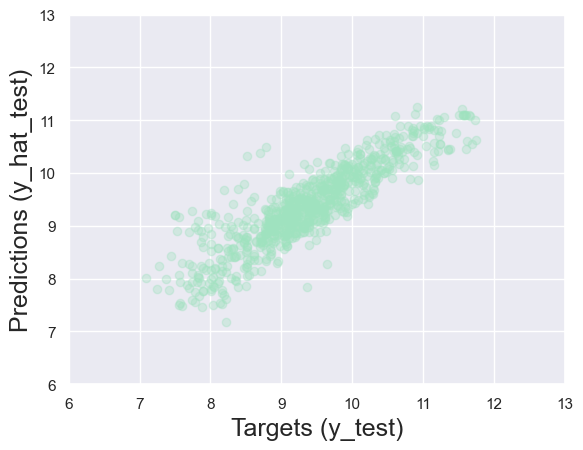

In [81]:
# Scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test, alpha=0.34) #alpha = 1 full opacity, alpha = 0 fully transparent
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
# The more staurated the color, the higher the concentraion

In [82]:
# Check these predictions
# To obtain the actual prices (not log prices), we take the exponential of the log_price with np.exp()
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [83]:
# Include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


- Note that lot of missing values (Target) suggests that something is wrong with the data frame / indexing

In [85]:
# Check what's wrong with data frame
y_test

1192     7.740664
3360     7.937375
2350     7.824046
3257     8.764053
892      9.121509
          ...    
1935    10.292146
3757     9.169518
3134     9.814656
1369    11.134589
2595     9.287301
Name: log_price, Length: 774, dtype: float64

- Upon inspecting this data frame, we can see that old indexes are still preserved
- Solution: forget this original indexing 

In [87]:
# Reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [88]:
# Overwrite the 'Target' column with the appropriate values again
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [89]:
# Calculate the difference between the targets and the predictions (to see how far target and prediction is)
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [90]:
# See how far off the predicted is from the target in form of result percentage-wise / residual difference %
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [91]:
# descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


- minimum different, 25%, 50%, 75% are very accurate
- However, the max differece is not accurate.

In [93]:
# Sometimes it is useful to check these outputs manually
pd.options.display.max_rows = 999 # To see all rows
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


In [258]:
#Model Accuracy
# Calculate the absolute difference percentage
df_pf['Abs Difference%'] = df_pf['Difference%'].abs()

# Calculate the mean absolute difference percentage (error percentage)
mean_error_percentage = df_pf['Abs Difference%'].mean()

# Calculate accuracy percentage
accuracy_percentage = 100 - mean_error_percentage

print("Accuracy: {:.2f}%".format(accuracy_percentage))

Accuracy: 63.74%


## In conclusion
- Our model is using mileage, engine volume, brand, registration and body type to predict the price of a used car with an accuracy of 63.74%
- On average, our model is fairly accurate at predicting prices. However, the predictions tend to overestimate the target price.
- Tips to improve our model:
  1. Use different set of variables
  2. Remove a bigger part of the outliers
  3. Use different kinds of transformations